<a href="https://colab.research.google.com/github/MohammadMazraeh/realtime-crypto-analysis/blob/master/pie_chart_news_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DISTRIBUTION OF NEWS ARTICLE AND SENTIMENTS IS STUDIED.**

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
import json
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import glob
from datetime import datetime, timedelta
plt.rcParams['axes.facecolor'] = 'white'
#plt.rcParams["figure.edgecolor"] = 'b'
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

In [0]:
df1 = pd.read_csv('/content/drive/My Drive/data_2019_analysis.csv')
df1 = df1.drop('Unnamed: 0', 1)
df1.head()

,web_url,content,headline,document_type,pub_date,source,section_name,author,word_count,content_no_stopwords,SENTIMENT_VALUE,SENTIMENT,relevance
0,https://www.nytimes.com/2019/01/02/world/europ...,"halmstad, sweden — maria hussein, who escaped ...",Where Doulas Calm Nerves and Bridge Cultures D...,article,2019-01-02T22:17:38+0000,The New York Times,World,CHRISTINA ANDERSON,1326,"halmstad, sweden — maria hussein, escaped war ...",1.0,Very Positive,1
1,https://www.nytimes.com/2019/01/02/us/politics...,"voting rights and partisan gerrymandering, tra...",Voting Issues and Gerrymanders Are Now Key Pol...,article,2019-01-02T17:00:47+0000,The New York Times,U.S.,TRIP GABRIEL,1779,"voting rights partisan gerrymandering, traditi...",1.0,Very Positive,1
2,https://www.nytimes.com/2019/01/02/world/asia/...,"new delhi — two women, accompanied by plainclo...","2 Indian Women Enter Sabarimala Temple, Settin...",article,2019-01-02T12:37:37+0000,The New York Times,World,KAI SCHULTZ and AYESHA VENKATARAMAN,778,"new delhi — two women, accompanied plainclothe...",-0.8,Very Negative,1
3,https://www.nytimes.com/2019/01/01/us/politics...,good tuesday morning and happy new year. here ...,On Politics: Elizabeth Warren Is Running for P...,article,2019-01-01T05:18:48+0000,The New York Times,U.S.,NaN,419,good tuesday morning happy new year. stories m...,0.9,Very Positive,1
4,https://www.nytimes.com/2018/12/31/world/asia/...,"tokyo — kim jong-un, north korea’s leader, sai...","Kim Jong-un, Ready to Meet Trump ‘at Any Time,...",article,2019-01-01T01:44:15+0000,The New York Times,World,MOTOKO RICH and DAVID E. SANGER,1319,"tokyo — kim jong-un, north korea’s leader, sai...",1.0,Very Positive,1


In [0]:
news_type = df1.groupby('section_name').agg('count')
sentiment_type = df1.groupby('SENTIMENT').agg('count')


In [0]:
sentiment_type

,web_url,content,headline,document_type,pub_date,source,section_name,author,word_count,content_no_stopwords,SENTIMENT_VALUE,relevance
SENTIMENT,,,,,,,,,,,,
Negative,98,98,98,98,98,98,98,92,98,98,98,98
Neutral,11,11,11,11,11,11,11,11,11,11,11,11
Positive,70,70,70,70,70,70,70,68,70,70,70,70
Very Negative,1302,1302,1302,1302,1302,1302,1302,1272,1302,1302,1302,1302
Very Positive,1760,1760,1760,1760,1760,1760,1760,1676,1760,1760,1760,1760


In [0]:
news_type

,web_url,content,headline,document_type,pub_date,source,author,word_count,content_no_stopwords,SENTIMENT_VALUE,SENTIMENT,relevance
section_name,,,,,,,,,,,,
Business,371,371,371,371,371,371,340,371,371,371,371,371
Business Day,231,231,231,231,231,231,212,231,231,231,231,231
Technology,162,162,162,162,162,162,159,162,162,162,162,162
U.S.,1380,1380,1380,1380,1380,1380,1313,1380,1380,1380,1380,1380
World,1068,1068,1068,1068,1068,1068,1066,1068,1068,1068,1068,1068
Your Money,29,29,29,29,29,29,29,29,29,29,29,29


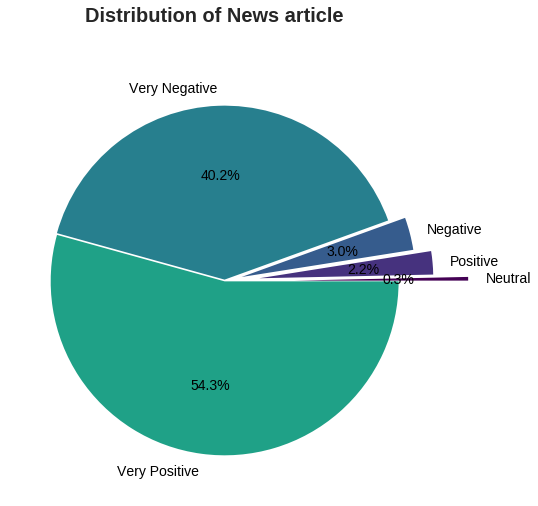

In [0]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt
%matplotlib inline


section_name_labels = sentiment_type.section_name.sort_values().index
section_name_counts = sentiment_type.section_name.sort_values()

SENTIMENT_labels = news_type.SENTIMENT.sort_values().index
SENTIMENT_counts = news_type.SENTIMENT.sort_values()


plt.figure(1, figsize=(12,8))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

explode = (0.4, 0.2, 0.1, 0.01,0.0)


section_pie = plt.pie(section_name_counts, labels=section_name_labels, autopct='%1.1f%%', shadow=False, colors=colors,explode=explode,textprops={'color':"black",'fontsize': 14})


plt.suptitle('Distribution of News article', fontsize=20,weight="bold")


plt.show()


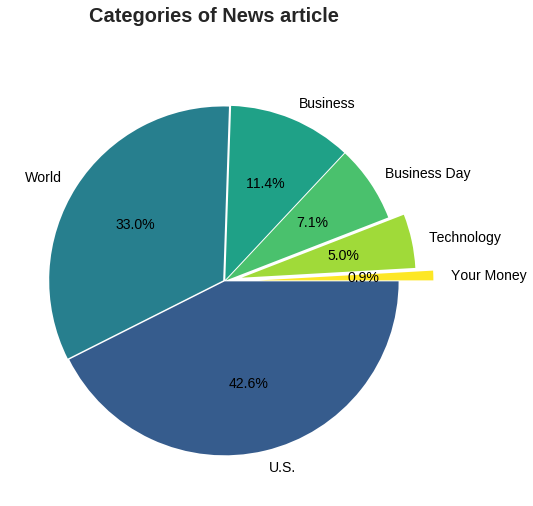

In [0]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt
%matplotlib inline


section_name_labels = sentiment_type.section_name.sort_values().index
section_name_counts = sentiment_type.section_name.sort_values()

SENTIMENT_labels = news_type.SENTIMENT.sort_values().index
SENTIMENT_counts = news_type.SENTIMENT.sort_values()


plt.figure(1, figsize=(12,8))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('viridis_r')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

explode = (0.2, 0.1, 0.01, 0.01,0.01,0.0)


section_pie = plt.pie(SENTIMENT_counts, labels=SENTIMENT_labels, autopct='%1.1f%%', shadow=False, colors=colors,explode=explode,textprops={'color':"black",'fontsize': 14})

plt.suptitle('Categories of News article', fontsize=20,weight="bold")


plt.show()

